In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error, explained_variance_score, max_error, confusion_matrix, f1_score, recall_score, roc_auc_score, roc_curve, precision_score, accuracy_score, classification_report, precision_recall_curve, average_precision_score, matthews_corrcoef

In [4]:
# Read test scores from model
predictions = pd.read_csv(Path("../models/EFB0_SS_W3_stardist_rf06_all_balanced/test/test_predictions_4.csv"))
predictions.head()

,scores,target,prediction
0,0.980004,1,1
1,0.979870,1,1
2,0.006948,0,0
3,0.904191,1,1
4,1.001042,1,1


In [6]:
# Create CIN classification
predictions["target_cin"] = np.where(predictions["target"] > 0, 1, 0)
predictions["prediction_cin"] = np.where(predictions["prediction"] > 0, 1, 0)
predictions.head()

,scores,target,prediction,target_cin,prediction_cin
0,0.980004,1,1,1,1
1,0.979870,1,1,1,1
2,0.006948,0,0,0,0
3,0.904191,1,1,1,1
4,1.001042,1,1,1,1


In [10]:
print(classification_report(predictions["target_cin"], predictions["prediction_cin"]))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1311
           1       0.95      0.98      0.97      1311

    accuracy                           0.96      2622
   macro avg       0.97      0.96      0.96      2622
weighted avg       0.97      0.96      0.96      2622



In [11]:
print(classification_report(predictions["target"], predictions["prediction"]))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1311
           1       0.92      0.96      0.94      1169
           2       0.75      0.74      0.75       111
           3       0.76      0.83      0.79        23
           4       0.75      0.50      0.60         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.94      2622
   macro avg       0.60      0.57      0.58      2622
weighted avg       0.94      0.94      0.94      2622



/Users/miguelibarra/.miniconda3/envs/stable/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miguelibarra/.miniconda3/envs/stable/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miguelibarra/.miniconda3/envs/stable/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [22]:
# F1 score
print(f"F1 CIN                = {f1_score(predictions['target_cin'], predictions['prediction_cin'])}")
print(f"F1 micronuclei        = {f1_score(predictions['target'], predictions['prediction'], average='weighted')}")

# Precision
print(f"Precision CIN         = {precision_score(predictions['target_cin'], predictions['prediction_cin'])}")
print(f"Precision micronuclei = {precision_score(predictions['target'], predictions['prediction'], average='weighted')}")

# Recall
print(f"Recall CIN            = {recall_score(predictions['target_cin'], predictions['prediction_cin'])}")
print(f"Recall micronuclei    = {recall_score(predictions['target'], predictions['prediction'], average='weighted')}")

# R2
# print(f"R2 CIN                = {r2_score(predictions['target_cin'], predictions['prediction_cin'])}")
print(f"R2 micronuclei        = {r2_score(predictions['target'], predictions['prediction'])}")

# RMSE
# print(f"RMSE CIN              = {mean_squared_error(predictions['target_cin'], predictions['prediction_cin'], squared=False)}")
print(f"RMSE micronuclei      = {mean_squared_error(predictions['target'], predictions['prediction'], squared=True)}")

#

F1 CIN                = 0.9651815799326094
F1 micronuclei        = 0.9417055380961143
Precision CIN         = 0.9477941176470588
Precision micronuclei = 0.9426398546713692
Recall CIN            = 0.9832189168573608
Recall micronuclei    = 0.9416475972540046
R2 CIN                = 0.8581235697940504
R2 micronuclei        = 0.8541687792017347
RMSE micronuclei      = 0.06254767353165523


/Users/miguelibarra/.miniconda3/envs/stable/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


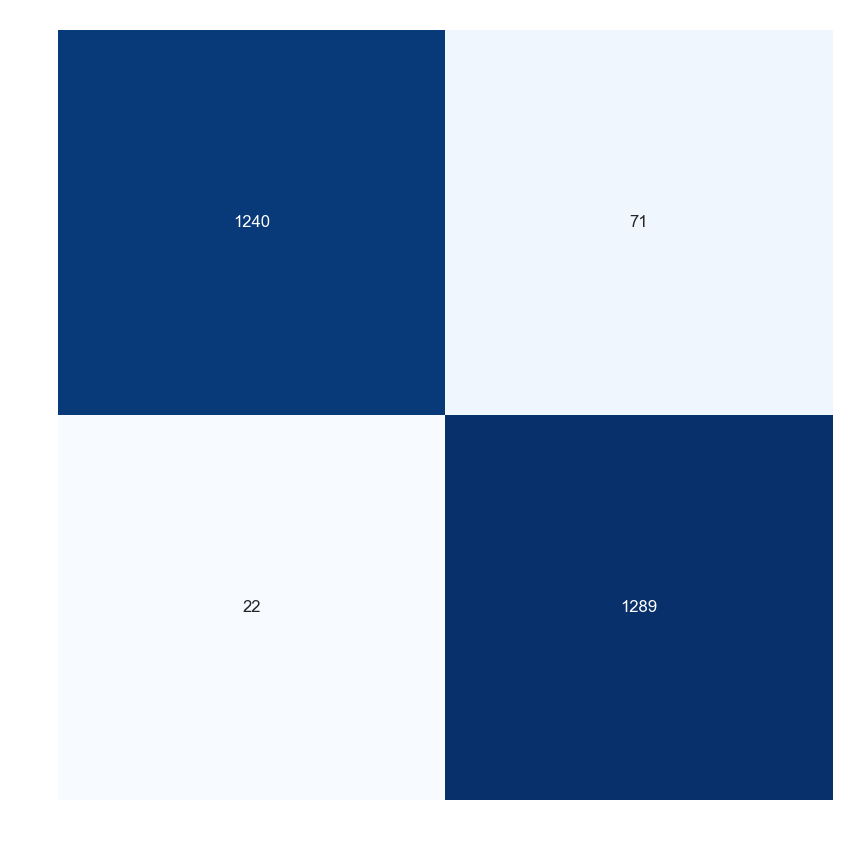

In [35]:
data = confusion_matrix(predictions["target_cin"], predictions["prediction_cin"])
sns.set(style="white", rc={'ytick.labelcolor':'white','xtick.labelcolor':'white', 'text.color':'white'})
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False)
ax.set_title("Confusion matrix for CIN detection", color="white")
ax.set_xlabel("Predicted", color="white")
ax.set_ylabel("True", color="white")
fig.savefig("../figures/cm_cin_test_EFB0_SS_W3_stardist_rf06_all_balanced_model4.png", dpi=300, bbox_inches="tight", transparent=True)
fig.savefig("../figures/cm_cin_test_EFB0_SS_W3_stardist_rf06_all_balanced_model4.pdf", dpi=300, bbox_inches="tight", transparent=True)


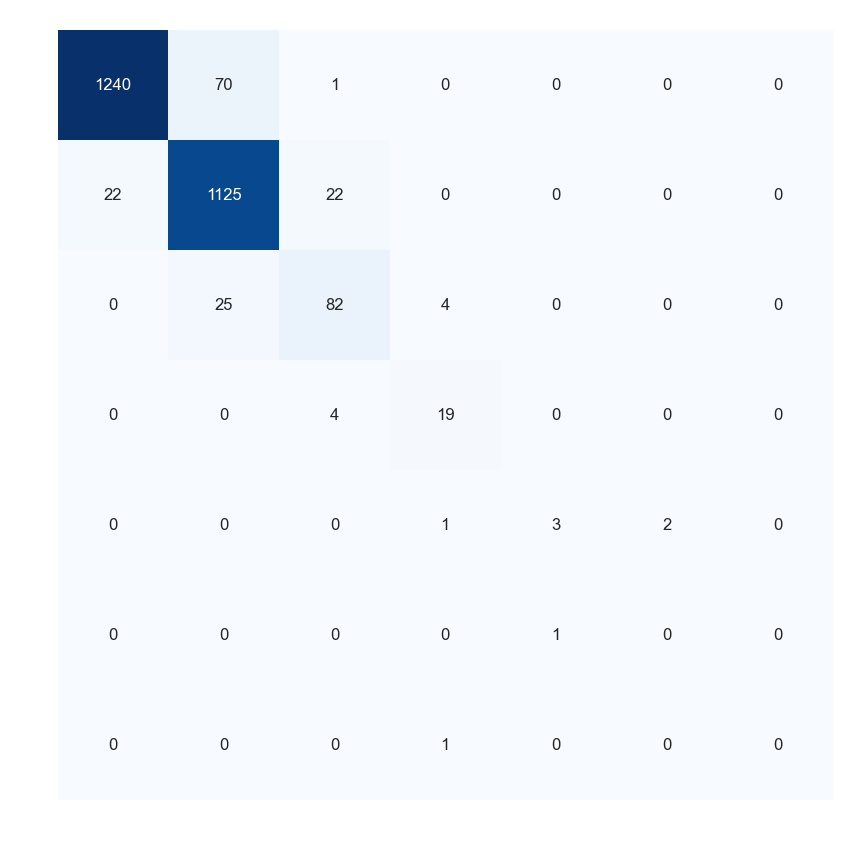

In [34]:
sns.set(rc={'ytick.labelcolor':'white','xtick.labelcolor':'white', 'text.color':'white'})
data = confusion_matrix(predictions["target"], predictions["prediction"])
fig, ax  = plt.subplots(figsize=(10,10))
sns.heatmap(data, annot=True, fmt="d", cmap="Blues",ax = ax, cbar=False)
ax.set_title("Confusion matrix for micronuclei classification", color="white")
ax.set_xlabel("Predicted", color="white")
ax.set_ylabel("True", color="white")
fig.savefig("../figures/cm_micronuclei_test_EFB0_SS_W3_stardist_rf06_all_balanced_model4.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/cm_micronuclei_test_EFB0_SS_W3_stardist_rf06_all_balanced_model4.pdf", dpi=300, bbox_inches='tight', transparent=True)

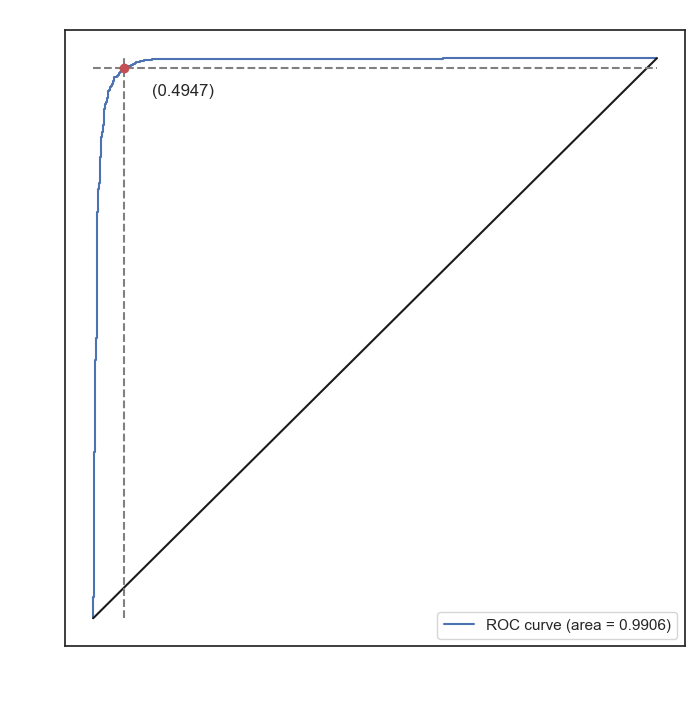

In [69]:
# Plot ROC curve
rocauc = roc_auc_score(predictions["target_cin"], predictions["scores"])
sns.set_style("white")
fpr, tpr, thresholds = roc_curve(predictions["target_cin"], predictions["scores"])
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(fpr, tpr, label=f"ROC curve (area = {rocauc:.4f})")
ax.plot([0, 1], [0, 1], 'k-')
cutoff = 107
ax.hlines(tpr[cutoff], 0, 1, linestyles="--", colors="grey")
ax.vlines(fpr[cutoff], 0, 1, linestyles="--", colors="grey")
ax.plot(fpr[cutoff], tpr[cutoff], "ro")
ax.text(fpr[cutoff]+0.05, tpr[cutoff]-0.05, f"({thresholds[cutoff]:.4f})")

ax.set_title('ROC curve', color="white")
ax.set_xlabel('False Positive Rate', color="white")
ax.set_ylabel('True Positive Rate', color="white")
ax.legend(loc="lower right")

fig.savefig("../figures/auroc_micronuclei_test_EFB0_SS_W3_stardist_rf06_all_balanced_model4.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/auroc_micronuclei_test_EFB0_SS_W3_stardist_rf06_all_balanced_model4.pdf", dpi=300, bbox_inches='tight', transparent=True)
# fig.savefig("../data/test_data/figures_roc.png", dpi=300)

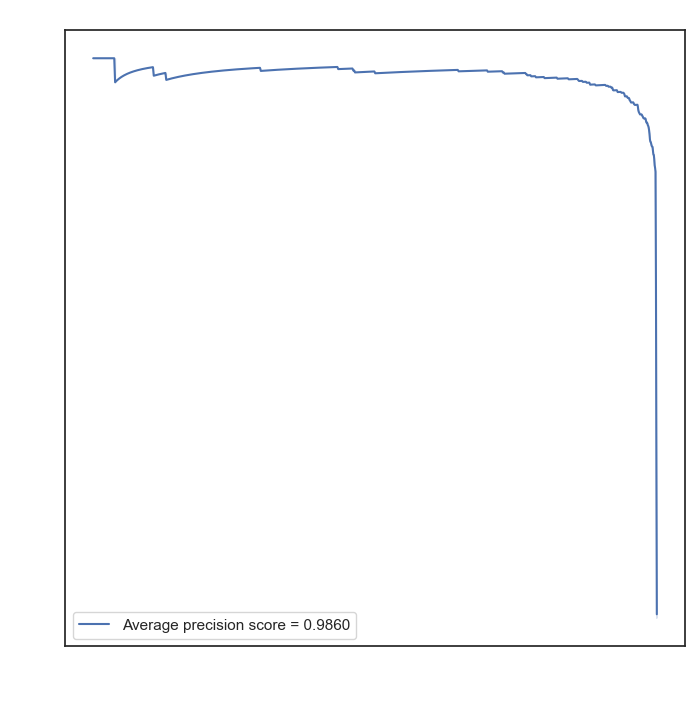

In [84]:
precision, recall, _ = precision_recall_curve(predictions["target_cin"], predictions["scores"])
average_precision = average_precision_score(predictions["target_cin"], predictions["scores"])

sns.set(style="white")
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.lineplot(x=recall, y=precision, label=f'Average precision score = {average_precision:.4f}', ax=ax)

ax.set_xlabel('Recall', color="white")
ax.set_ylabel('Precision', color="white")
ax.set_title('Precision-Recall Curve', color="white")
plt.legend(loc='lower left')

fig.savefig("../figures/prc_micronuclei_test_EFB0_SS_W3_stardist_rf06_all_balanced_model4.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/prc_micronuclei_test_EFB0_SS_W3_stardist_rf06_all_balanced_model4.pdf", dpi=300, bbox_inches='tight', transparent=True)

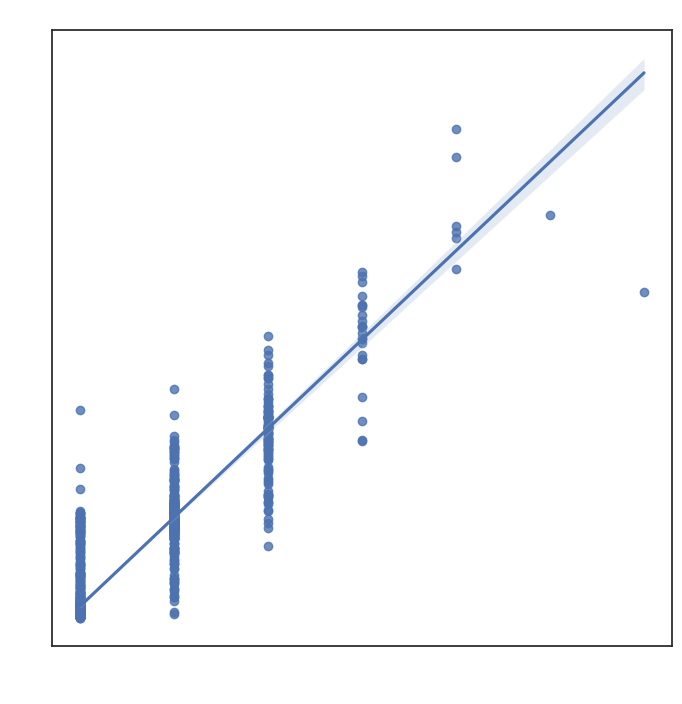

In [87]:
# Regression plotsns.set(style="white")
sns.set(style="white")
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
r2 = r2_score(predictions['target'], predictions['prediction'])
sns.regplot(data=predictions, x="target", y="scores", ax=ax)
ax.set_title(f'Regression R2 = {r2:.4f}', color="white")
ax.set_xlabel('Target', color="white")
ax.set_ylabel('Scores', color="white")
fig.savefig("../figures/regr2_micronuclei_test_EFB0_SS_W3_stardist_rf06_all_balanced_model4.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/regr2_micronuclei_test_EFB0_SS_W3_stardist_rf06_all_balanced_model4.pdf", dpi=300, bbox_inches='tight', transparent=True)

In [217]:
# Get phi coefficient
print(f"Phi score mnc = {matthews_corrcoef(predictions['target'], predictions['prediction']):.4f}")
print(f"Phi score cin = {matthews_corrcoef(predictions['target_cin'], predictions['prediction_cin']):.4f}")

Phi score mnc = 0.8945
Phi score cin = 0.9297


In [182]:
# To play with
play =  predictions.copy()
play

,scores,target,prediction,target_cin,prediction_cin
0,0.980004,1,1,1,1
1,0.979870,1,1,1,1
2,0.006948,0,0,0,0
3,0.904191,1,1,1,1
4,1.001042,1,1,1,1
...,...,...,...,...,...
2617,0.047580,0,0,0,0
2618,0.994878,1,1,1,1
2619,1.000797,1,1,1,1
2620,1.035982,1,1,1,1


In [207]:
val = 4
mask=play["target"]==val
play[f"t{val}"] = 0
play[f"t{val}"] = play[f"t{val}"].where(~mask, 1)
play

,scores,target,prediction,target_cin,prediction_cin,t2,t0,t1,t3,t4
0,0.980004,1,1,1,1,0,0,1,0,0
1,0.979870,1,1,1,1,0,0,1,0,0
2,0.006948,0,0,0,0,0,1,0,0,0
3,0.904191,1,1,1,1,0,0,1,0,0
4,1.001042,1,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2617,0.047580,0,0,0,0,0,1,0,0,0
2618,0.994878,1,1,1,1,0,0,1,0,0
2619,1.000797,1,1,1,1,0,0,1,0,0
2620,1.035982,1,1,1,1,0,0,1,0,0


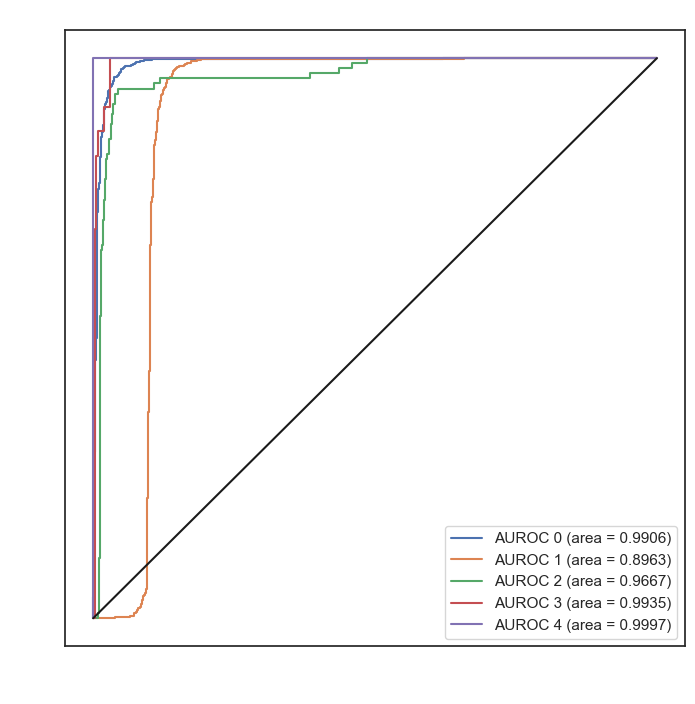

In [210]:
# Plot ROC curve
sns.set_style("white")

rocauc0 = roc_auc_score(play["t0"], play["scores"])
rocauc1 = roc_auc_score(play["t1"], play["scores"])
rocauc2 = roc_auc_score(play["t2"], play["scores"])
rocauc3 = roc_auc_score(play["t3"], play["scores"])
rocauc4 = roc_auc_score(play["t4"], play["scores"])

fpr0, tpr0, thresholds = roc_curve(play["t0"], play["scores"])
fpr1, tpr1, thresholds = roc_curve(play["t1"], play["scores"])
fpr2, tpr2, thresholds = roc_curve(play["t2"], play["scores"])
fpr3, tpr3, thresholds = roc_curve(play["t3"], play["scores"])
fpr4, tpr4, thresholds = roc_curve(play["t4"], play["scores"])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(tpr0,fpr0 , label=f"AUROC 0 (area = {1-rocauc0:.4f})")
ax.plot(fpr1, tpr1, label=f"AUROC 1 (area = {rocauc1:.4f})")
ax.plot(fpr2, tpr2, label=f"AUROC 2 (area = {rocauc2:.4f})")
ax.plot(fpr3, tpr3, label=f"AUROC 3 (area = {rocauc3:.4f})")
ax.plot(fpr4, tpr4, label=f"AUROC 4 (area = {rocauc4:.4f})")
ax.plot([0, 1], [0, 1], 'k-')
plt.legend()

ax.set_title('ROC curve', color="white")
ax.set_xlabel('False Positive Rate', color="white")
ax.set_ylabel('True Positive Rate', color="white")
ax.legend(loc="lower right")

fig.savefig("../figures/auroc_micronuclei_test_EFB0_SS_W3_stardist_rf06_all_balanced_model4_classes.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/auroc_micronuclei_test_EFB0_SS_W3_stardist_rf06_all_balanced_model4_classes.pdf", dpi=300, bbox_inches='tight', transparent=True)
# fig.savefig("../data/test_data/figures_roc.png", dpi=300)